# Data Visualization with Python and Jupyter

<a id="data"></a>
## Load the data 

In [1]:
# Place cursor below and insert the Pandas DataFrame for the Insurance Expense data
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_7f9f223fb97c47b1825f74f69691ee01 = 'https://s3.ap-geo.objectstorage.softlayer.net'
else:
    endpoint_7f9f223fb97c47b1825f74f69691ee01 = 'https://s3.ap-geo.objectstorage.service.networklayer.com'

client_7f9f223fb97c47b1825f74f69691ee01 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9kL9FeL6AA8jD4h62vexXBPE0D15i4H6I-EgkuJkzcRb',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_7f9f223fb97c47b1825f74f69691ee01)

body = client_7f9f223fb97c47b1825f74f69691ee01.get_object(Bucket='jumpstartyourjourney-donotdelete-pr-uxuydsi0s4ynks',Key='insurance.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Update the variable for our Pandas dataframe

In [3]:
# Replace data_df_1 with the variable name generated above.
df = df_data_2

<a id="visualize"></a>
## Visualize Data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

In [5]:
import seaborn as sns

### Statistical description

In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### Question 1: Is there relationship between BMI and insurance expenses?

We'll explore the data by asking a series of questions (hypothesis). The use of plots can help us to find relationships and correlations.
[`Body Mass Index`](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm)  (BMI) is a measure of body fat based on height and weight that applies to adult men and women. It is often correlated with health outcomes, so let's use a [`Seaborn jointplot`](http://seaborn.pydata.org/generated/seaborn.jointplot.html) with a scatterplot to see if that holds for our data.

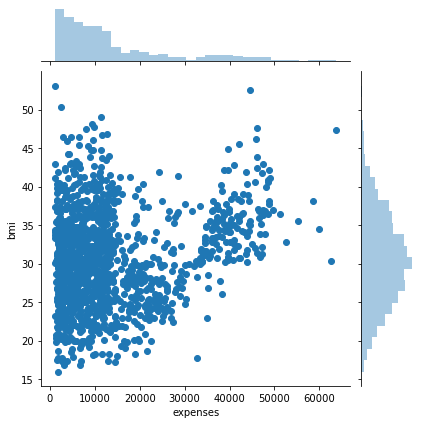

In [7]:
sns.jointplot(x=df["expenses"], y=df["bmi"], kind="scatter")

plt.show()

#### Answer:

It doesn't not appear that there is a good correlation between BMI and the expenses for these patients. We see from the histogram on the right that BMI is normally distributed, and from the histogram on top we see that Expenses are clustered around the lower amounts. It does not look like BMI would be a good predictor of the expenses.

### Question 2:  Is there relationship between gender and insurance expenses?

Our next hypothesis might be that there is a correlation between gender and expenses. We can use the [`Seaborn boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html). A boxplot uses quartiles to show how the data is distributed, and will give us a good comparison between the 2 categories represented by `gender`. The horizontal line through our boxes is the median value. The area above the median line is the 3rd quartile, representing the values of the 50th-75th percentiles, and the area below the median line is the 2nd quartile, representing the values of the 25th-50th percentiles. The rest of the data is collapse into lines called "whiskers" and outliers are plotted as single points.

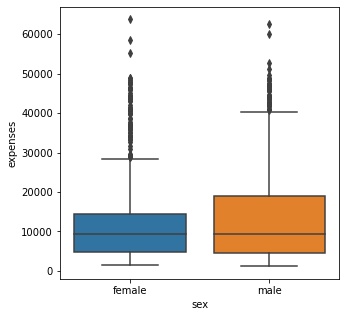

In [8]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'sex', y = 'expenses',  data = df)

#### Answer: 
On average claims from male and female are the same, and both have approximately the same median (the value in the middle of the distribution. The 3rd quartile is "fatter" for the males, meaning there is a broader distribution of values, and it skews to a higher amount. The 4th quartile also skews higher for the males, so this category contains more of the higher expenses.

### Question 3: Is there relationship between region and claim amount?

Perhaps there is a correlation between the various regions and the insurance expenses. We can once again use a series of boxplots to see the differences betweent the regions.

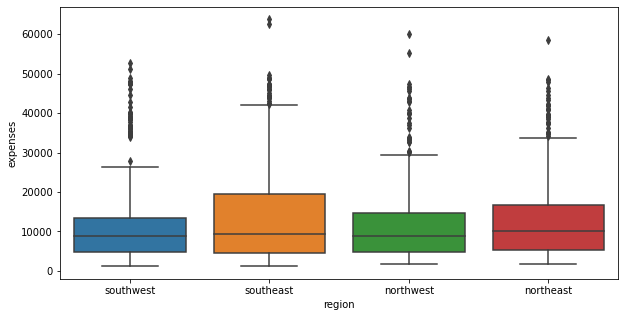

In [9]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'region', y = 'expenses',  data = df)

#### Answer: 

In this case we see that the median values across regions are nearly the same. There is some variation for the distribution of expense values, and the southeast reagion has more of the higher values in the 3rd and 4th quartile. The differences aren't particularly large, however, and it is unlikely that region could be a good predictor of expenses.

### Question: Is there relationships between claim amount between smokers and non-smokers?

Given the overwhelming evidence that smoking causes mortality (death) and morbidity (disease), we might guess that there is a relationship betweem insurance claims and smoking.
Let's use a boxplot to examine this.

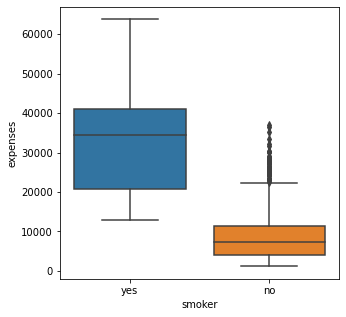

In [10]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'smoker', y = 'expenses',  data = df)

#### Answer: 

We can see that the mean, and indeed the entire interquartile range from 25% to 75% is much higher in expense for the smokers than for the non-smokers. It looks like whether or not an individual is a smoker could be a good predictor of insurance expenses.

### Question: is the smoker group well represented?

We'll want to make sure that we have a pretty good sample size for both groups.

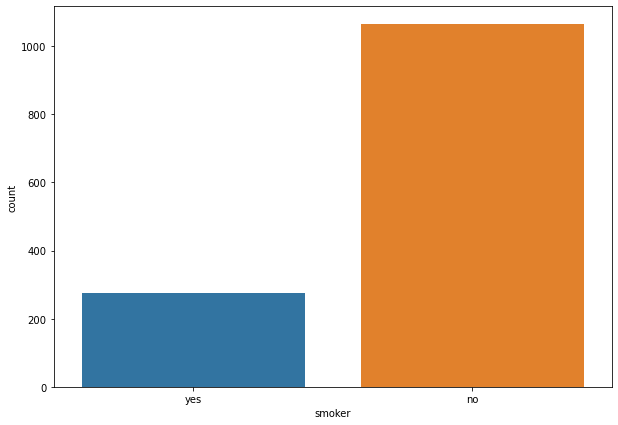

In [11]:
# make the plot a little bigger
countplt, ax = plt.subplots(figsize = (10,7))

ax = sns.countplot(x='smoker', data=df)

#### Answer:

Yes, it looks like smokers are a large enough group to be statistically significant.

### Question: Is there relationship between claim amount and age?

It seems reasonable to assume that there might be different insurance costs for different age groups. For example, older adults tend to require more health care.
Since this is continuous data, let's use a scatter plot to investigate.

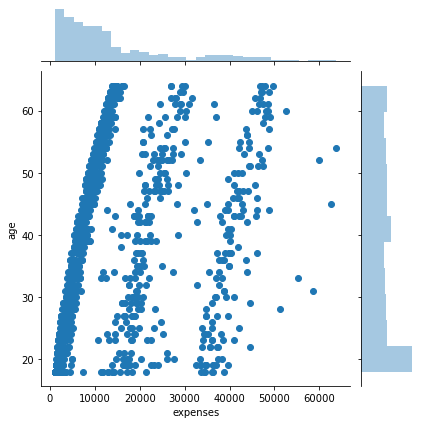

In [12]:
sns.jointplot(x=df['expenses'], y=df['age'], kind='scatter')

plt.show()

#### Answer: 

Yes, it does look like Claim amounts increase with age. Furthermore, there are interesting bands around the expenses for `$1,200`, up to `$3,000`, and above `$3,000`.

<a id="understand"></a>
## 4.0 Understand data

Now that we have had a look at the data, let's bring some of this information together.

In order to look at the relationship between multiple variables, we can use the [`Seaborn pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) method. This will plot each of the variables of the data set on both the x and y axes, in every possible combination. From this we can quickly see patterns that indicate the relationship between the variables.
We'll use the `hue`  to color one of the features in the plot to compare it to the other 2 variables.


### 4.1 Impact of Smoking

See which variable correlate with smoking. `Red` indicates a smoker.

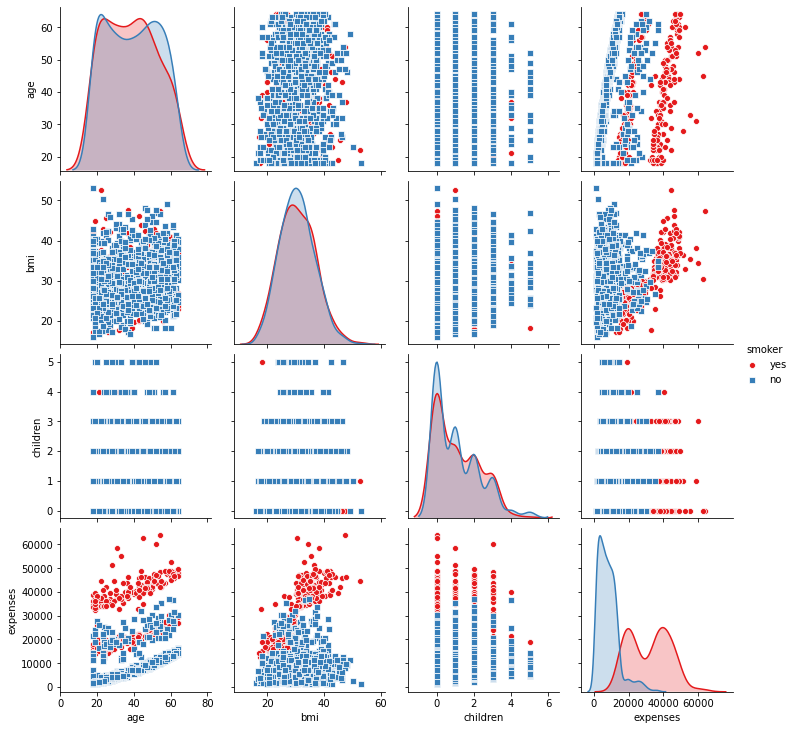

In [13]:
claim_pplot=df[['age', 'bmi', 'children', 'smoker', 'expenses']]
claim_pplot.head()
sns.pairplot(claim_pplot, kind="scatter", hue = "smoker" , markers=["o", "s"], palette="Set1")
plt.show()

#### Analyis

We can see some interesting things from these plots. Whereas older people tend to have more expenses, we can see from `age` vs. `expenses` that smoking is a more dominant feature. The same holds for `BMI` vs `expenses`. 

### 4.2  Impact of Gender

What is the correlation between the features and gender. `Red` is female, `Blue` is male.

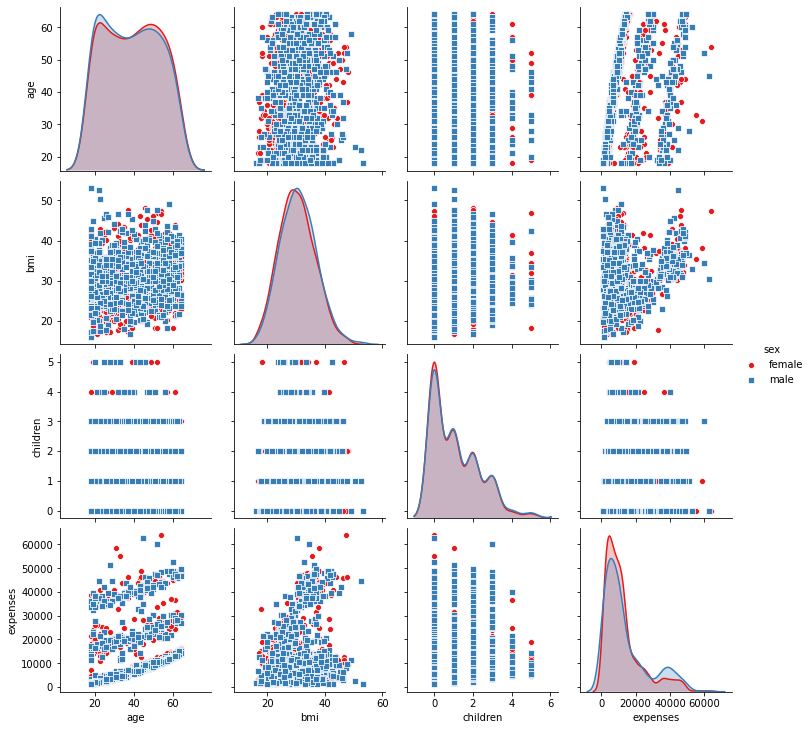

In [14]:
claim_pplot=df[['age', 'bmi', 'children', 'sex', 'expenses']]
claim_pplot.head()
sns.pairplot(claim_pplot, kind="scatter", hue = "sex" , markers=["o", "s"], palette="Set1")
plt.show()

#### Analysis: 

Gender has very little impact of the expenses.

#### REGION IMPACT

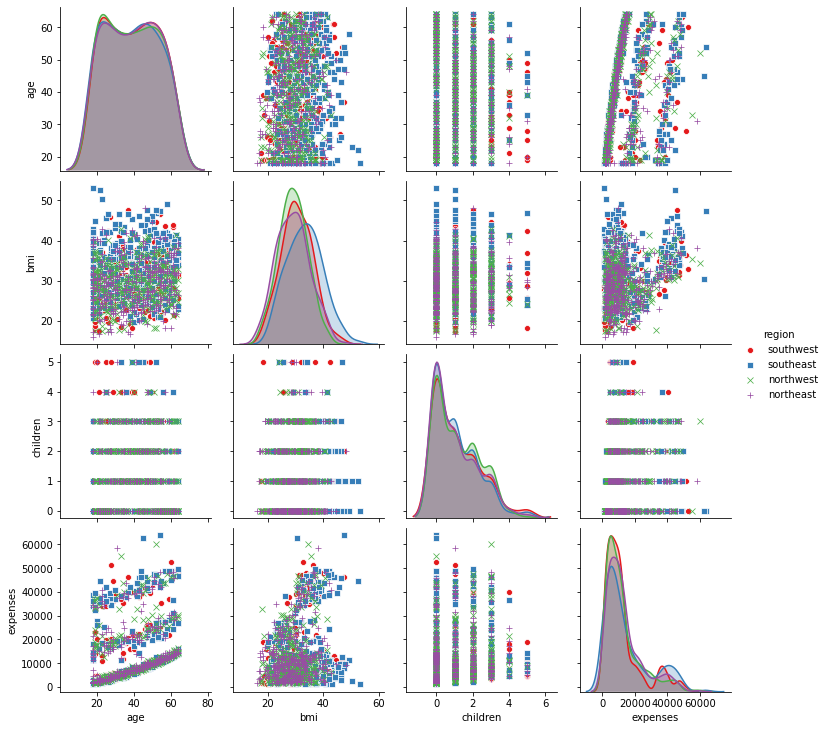

In [15]:
claim_pplot=df[['age', 'bmi', 'children', 'region', 'expenses']]
claim_pplot.head()
sns.pairplot(claim_pplot, kind="scatter", hue = "region" , markers=["o", "s","x","+"], palette="Set1")
plt.show()

#### Analysis: 

Region does have some imact on the expenses, which can be seen in the `age` vs. `expenses` chart where the `northeast` region appears in the lowest band more commonly, followed by the `northwest` region, and the `southeast` region is clearly higher and more prevelant in the highest band.

### Show correlations

We can quantify the correlations between features of the data set using [`Pandas corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) method. This will output a table with a numberical value for the correlation coefficient.

In [16]:
df[['age', 'sex','bmi', 'children', 'smoker', 'region', 'expenses']].corr(method='pearson')

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


#### Analysis:

We can see from the numerical correlation coefficient that there is little relationship amongst the numerical features.

## Summary: 

From our visual analysis of the data, we see that the best predictor of insurance claim expenses is whether or not the individual is a smoker.